IndexError: Column(s) HIERARCHY already selected

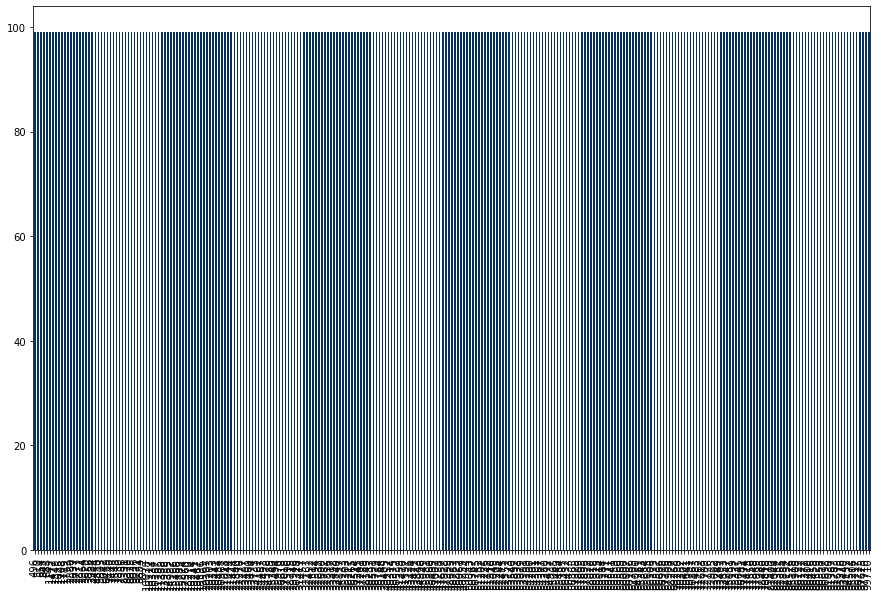

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('crime.csv', low_memory=False)

# Creates a new data frame which groups incident neighborhood as y value
# and the heirarchy sum as the x value. Only the top 10 are kept in the new
# dataframe. And then the data is plotted./FinalProject/
Name
Last Modified










Code

Python 3
.groupby(['INCIDENTNEIGHBORHOOD'])['HIERARCHY'].sum().nlargest(5)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
​
# Load the data
df = pd.read_csv('crime.csv', low_memory=False)
​
# Creates a new data frame which groups incident neighborhood as y value
# and the heirarchy sum as the x value. Only the top 10 are kept in the new
# dataframe. And then the data is plotted.
new_df = df.groupby(['INCIDENTNEIGHBORHOOD'])['HIERARCHY'].sum().nlargest(5)
new_df.plot(kind="bar")
<AxesSubplot:xlabel='INCIDENTNEIGHBORHOOD'>

# There is a problem with the data, however. Crimes like murder have a hierarchy value of 1 
# and if the crime is reported as NA the value is 99. Using a simple sum per neighborhood bar 
# plot will only show us where there are a lot of crimes reported as NA. To fix this we need to
# assign new values for the "HIERARCHY" column so that higher equals a more serious crime.
# Apply a lambda function to every value to swap from 1 being the most serious to 99 being the most serious.
df["HIERARCHY"] = df["HIERARCHY"].apply(lambda x: abs(100-x))
​
new_df = df.groupby(['INCIDENTNEIGHBORHOOD'])['HIERARCHY'].sum()
​
#new_df.head(5)
new_df.nlargest(5).plot(kind="bar")
<AxesSubplot:xlabel='INCIDENTNEIGHBORHOOD'>

# Now the new problem is neighborhoods that have more capita compared 
# to smaller neighborhoods. To compare each neighborhood fairly, I also
# examined the total population per neighborhood.
​
# Load the data
pop_df = pd.read_csv('total-population.csv', low_memory=False)
pop_df.head(5)
​
new_pop_df = pop_df.groupby(['Neighborhood'])['Estimate; Total'].sum()
​
# divide the crime by the population per neighborhood
divisionResults = new_df.div(new_pop_df)
​
divisionResults.nsmallest(5).plot(kind="bar")
#new_pop_df.nlargest(10).plot(kind="bar")
​
<AxesSubplot:>

​

new_df = df.groupby(['INCIDENTNEIGHBORHOOD'])['HIERARCHY'].sum().nlargest(5)
new_df.plot(kind="bar")

<AxesSubplot:xlabel='INCIDENTNEIGHBORHOOD'>

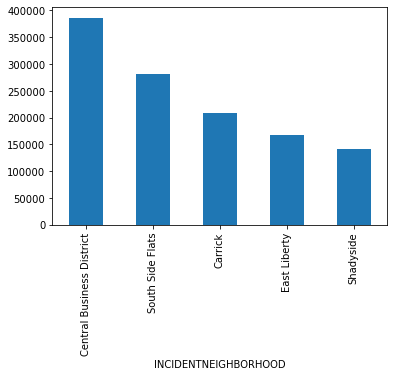

In [19]:
# There is a problem with the data, however. Crimes like murder have a hierarchy value of 1 
# and if the crime is reported as NA the value is 99. Using a simple sum per neighborhood bar 
# plot will only show us where there are a lot of crimes reported as NA. To fix this we need to
# assign new values for the "HIERARCHY" column so that higher equals a more serious crime.
# Apply a lambda function to every value to swap from 1 being the most serious to 99 being the most serious.
df["HIERARCHY"] = df["HIERARCHY"].apply(lambda x: abs(100-x))

new_df = df.groupby(['INCIDENTNEIGHBORHOOD'])['HIERARCHY'].sum()

#new_df.head(5)
new_df.nlargest(5).plot(kind="bar")

<AxesSubplot:>

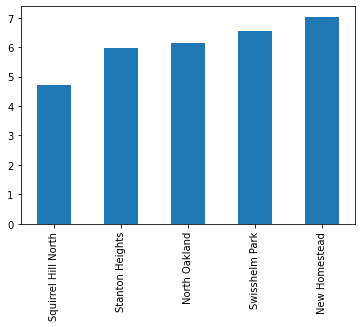

In [21]:
# Now the new problem is neighborhoods that have more capita compared 
# to smaller neighborhoods. To compare each neighborhood fairly, I also
# examined the total population per neighborhood.

# Load the data
pop_df = pd.read_csv('total-population.csv', low_memory=False)
pop_df.head(5)

new_pop_df = pop_df.groupby(['Neighborhood'])['Estimate; Total'].sum()

# divide the crime by the population per neighborhood
divisionResults = new_df.div(new_pop_df)

divisionResults.nsmallest(5).plot(kind="bar")
#new_pop_df.nlargest(10).plot(kind="bar")
